# **Analisis Komprehensif Distribusi dan Rasio Siswa-Guru di Sekolah Dasar Provinsi DKI Jakarta: Pendekatan Multivariate dan Temporal**

Proyek ini bertujuan untuk menganalisis distribusi jumlah siswa dan guru di sekolah dasar di Provinsi DKI Jakarta serta mengevaluasi rasio siswa-guru berdasarkan berbagai dimensi seperti wilayah, kecamatan, status sekolah, dan tren tahunan. Analisis ini menggunakan Google Colab untuk pemrosesan data dan Power BI Desktop untuk visualisasi interaktif.



## **Metodologi:**

###1. Pengumpulan dan Pembersihan Data:

- Mengimpor dataset.
- Menghapus duplikasi dan nilai yang hilang.
- Menghitung rasio siswa-guru.

### 2. Analisis Deskriptif:

- Menghitung statistik deskriptif.
- Membuat visualisasi distribusi jumlah siswa dan rasio siswa-guru.

### 3. Analisis Perbandingan:

- Membandingkan rata-rata dan total jumlah siswa serta guru berdasarkan status sekolah (Negeri vs. Swasta).
- Membuat visualisasi distribusi dan rasio siswa-guru berdasarkan wilayah dan kecamatan.

### 4. Analisis Temporal:

- Menganalisis tren tahunan rasio siswa-guru secara keseluruhan dan per kecamatan.
- Membuat visualisasi garis tren untuk melihat perubahan rasio siswa-guru dari waktu ke waktu.

### 5. Visualisasi Interaktif:

- Mengembangkan dashboard interaktif di Power BI Desktop untuk mengeksplorasi data secara mendalam.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = 'Filedata Data Jumlah Siswa dan Guru SD Provinsi DKI Jakarta.csv'
data = pd.read_csv(file_path)

In [ ]:
# Clean the data
data = data.drop_duplicates()
data = data.dropna()

In [ ]:
# Calculate the ratio of students to teachers
data['ratio_siswa_guru'] = data['pd'] / data['guru']

In [ ]:
# Descriptive statistics
desc_stats = data.describe()
print("Descriptive Statistics")
print(desc_stats)

Descriptive Statistics
                pd         guru   periode_data  ratio_siswa_guru
count  7104.000000  7104.000000    7104.000000       7101.000000
mean    338.247185    16.241554  202010.395270         21.106219
std     188.035257     9.010213      81.639633          7.423579
min       0.000000     0.000000  201912.000000          0.125000
25%     201.750000    10.000000  201912.000000         17.500000
50%     318.000000    14.000000  202012.000000         22.105263
75%     433.000000    20.000000  202112.000000         24.750000
max    1436.000000   105.000000  202112.000000        176.000000


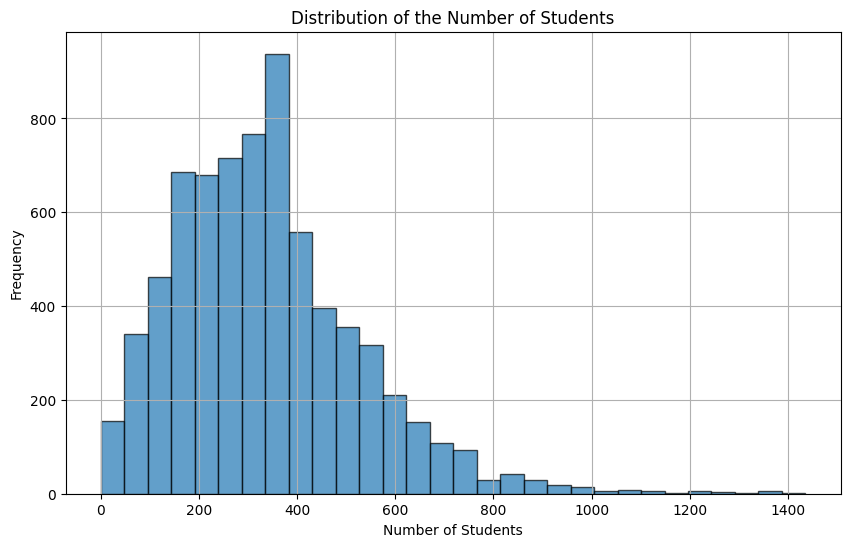

In [ ]:
# Visualize the distribution of the number of students
plt.figure(figsize=(10, 6))
plt.hist(data['pd'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of the Number of Students')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

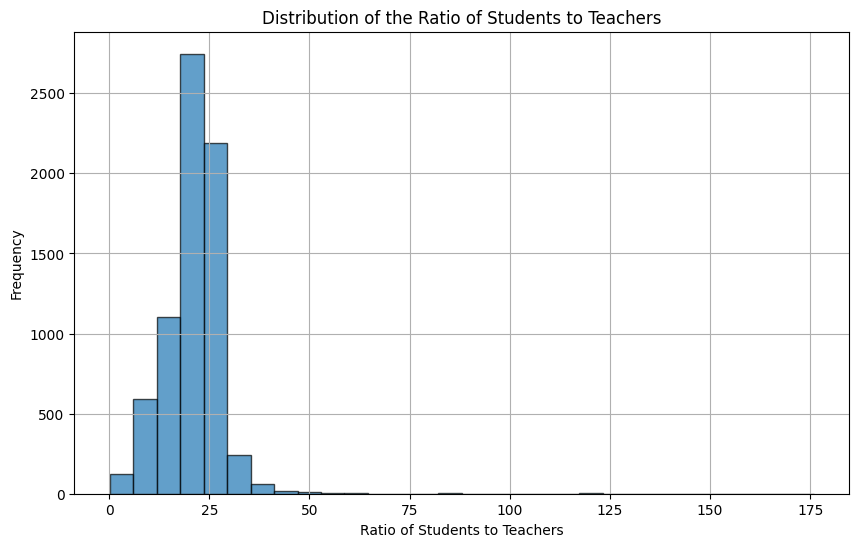

In [ ]:
# Visualize the distribution of the ratio of students to teachers
plt.figure(figsize=(10, 6))
plt.hist(data['ratio_siswa_guru'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of the Ratio of Students to Teachers')
plt.xlabel('Ratio of Students to Teachers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average number of students and teachers for public and private schools
avg_students_teachers = data.groupby('status')[['pd', 'guru', 'ratio_siswa_guru']].mean().reset_index()
print("Average Students and Teachers by School Status")
print(avg_students_teachers)

Average Students and Teachers by School Status
   status          pd       guru  ratio_siswa_guru
0  Negeri  386.347974  16.483813         23.483469
1  Swasta  259.177149  15.843320         17.194031


In [ ]:
# Calculate the total number of students and teachers for public and private schools
total_students_teachers = data.groupby('status')[['pd', 'guru']].sum().reset_index()
print("Total Students and Teachers by School Status")
print(total_students_teachers)

Total Students and Teachers by School Status
   status       pd   guru
0  Negeri  1706499  72809
1  Swasta   696409  42571


<ipython-input-13-b3613a6abe25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='pd', data=avg_students_teachers, palette='viridis')
<ipython-input-13-b3613a6abe25>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='guru', data=avg_students_teachers, palette='viridis')


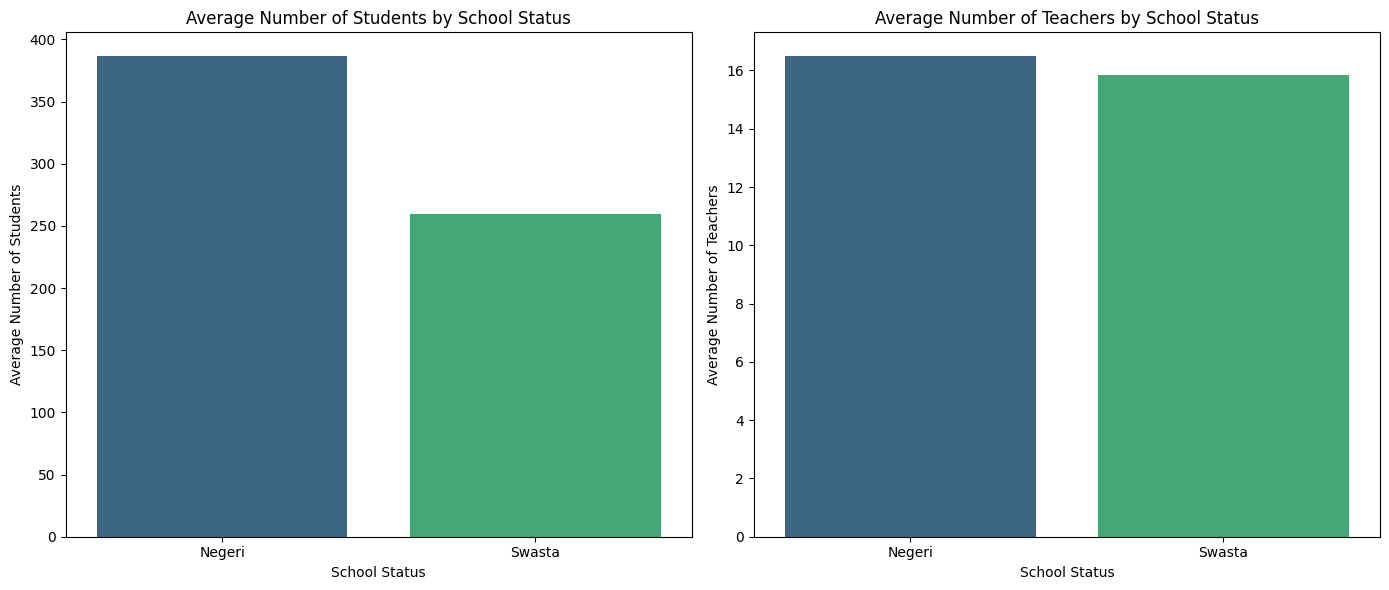

In [ ]:
# Bar plot for average number of students and teachers by school status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='status', y='pd', data=avg_students_teachers, palette='viridis')
plt.title('Average Number of Students by School Status')
plt.xlabel('School Status')
plt.ylabel('Average Number of Students')

plt.subplot(1, 2, 2)
sns.barplot(x='status', y='guru', data=avg_students_teachers, palette='viridis')
plt.title('Average Number of Teachers by School Status')
plt.xlabel('School Status')
plt.ylabel('Average Number of Teachers')
plt.tight_layout()
plt.show()

<ipython-input-14-a461f1dc67a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='pd', data=total_students_teachers, palette='coolwarm')
<ipython-input-14-a461f1dc67a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='guru', data=total_students_teachers, palette='coolwarm')


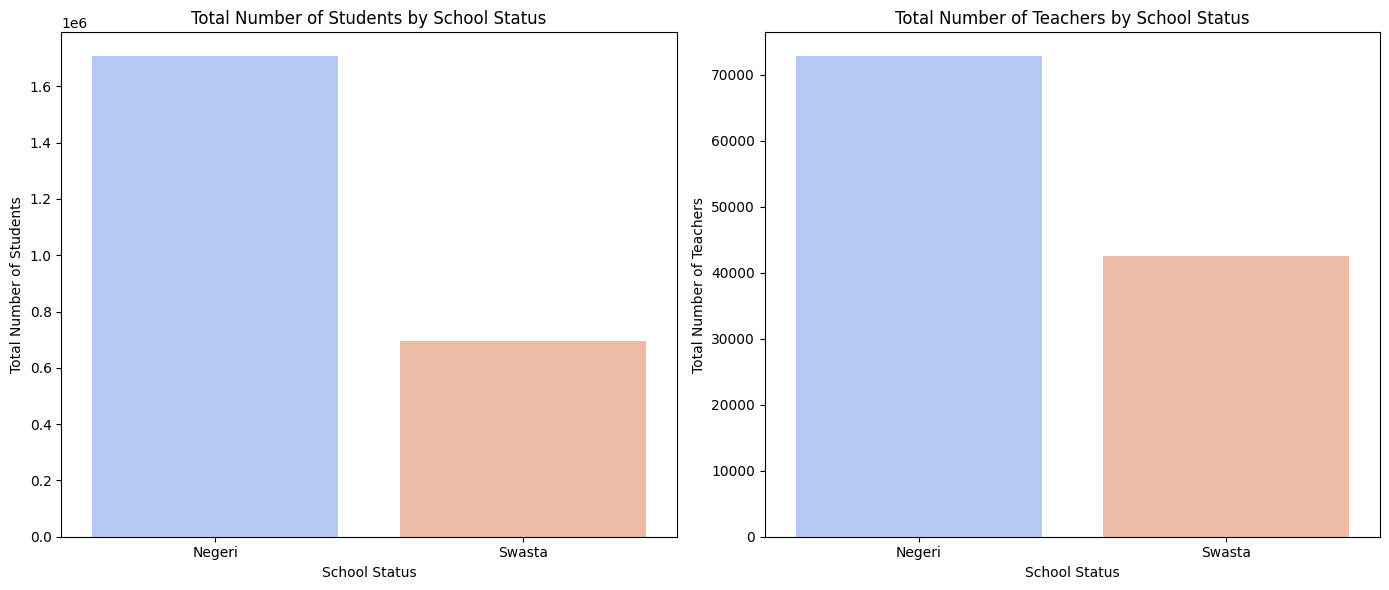

In [ ]:
# Bar plot for total number of students and teachers by school status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='status', y='pd', data=total_students_teachers, palette='coolwarm')
plt.title('Total Number of Students by School Status')
plt.xlabel('School Status')
plt.ylabel('Total Number of Students')

plt.subplot(1, 2, 2)
sns.barplot(x='status', y='guru', data=total_students_teachers, palette='coolwarm')
plt.title('Total Number of Teachers by School Status')
plt.xlabel('School Status')
plt.ylabel('Total Number of Teachers')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average ratio of students to teachers for each region
avg_ratio_per_region = data.groupby('wilayah')['ratio_siswa_guru'].mean().reset_index()
print("Average Student-Teacher Ratio by Region")
print(avg_ratio_per_region)

Average Student-Teacher Ratio by Region
                  wilayah  ratio_siswa_guru
0           Jakarta Barat         21.861706
1           Jakarta Pusat         21.119954
2         Jakarta Selatan         19.990105
3           Jakarta Timur         22.208688
4           Jakarta Utara         23.708276
5   Kab. Kepulauan Seribu         14.345016
6             Kep. Seribu         13.835054
7      Kota Jakarta Barat         21.308199
8      Kota Jakarta Pusat         19.210049
9    Kota Jakarta Selatan         19.293799
10     Kota Jakarta Timur         21.387055
11     Kota Jakarta Utara         22.503046


<ipython-input-16-8af15ed4fc0b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratio_siswa_guru', y='wilayah', data=avg_ratio_per_region, palette='magma')


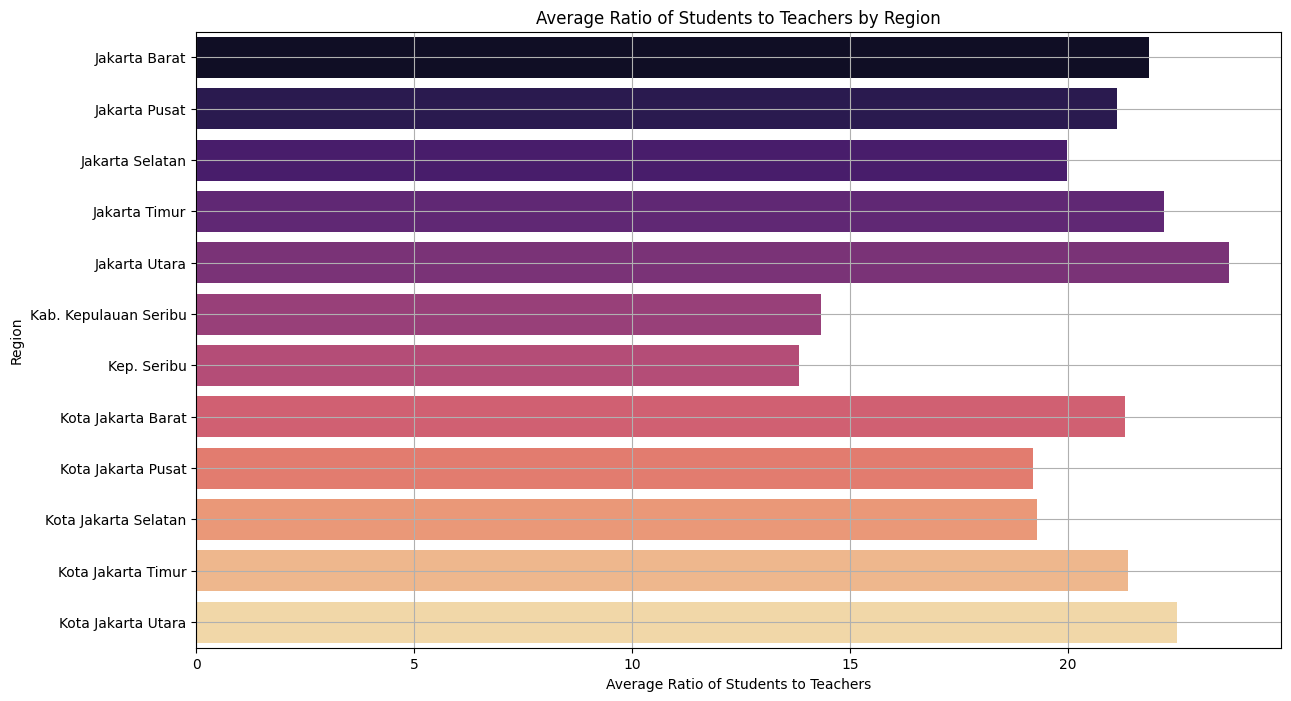

In [ ]:
# Bar plot for average ratio of students to teachers by region
plt.figure(figsize=(14, 8))
sns.barplot(x='ratio_siswa_guru', y='wilayah', data=avg_ratio_per_region, palette='magma')
plt.title('Average Ratio of Students to Teachers by Region')
plt.xlabel('Average Ratio of Students to Teachers')
plt.ylabel('Region')
plt.grid(True)
plt.show()

In [ ]:
# Convert 'periode_data' to string to extract year
data['year'] = data['periode_data'].astype(str).str[:4].astype(int)

In [ ]:
# Calculate the average ratio of students to teachers per year
avg_ratio_per_year = data.groupby('year')['ratio_siswa_guru'].mean().reset_index()
print("Average Student-Teacher Ratio per Year")
print(avg_ratio_per_year)

Average Student-Teacher Ratio per Year
   year  ratio_siswa_guru
0  2019         21.697742
1  2020         20.120720
2  2021         21.496004


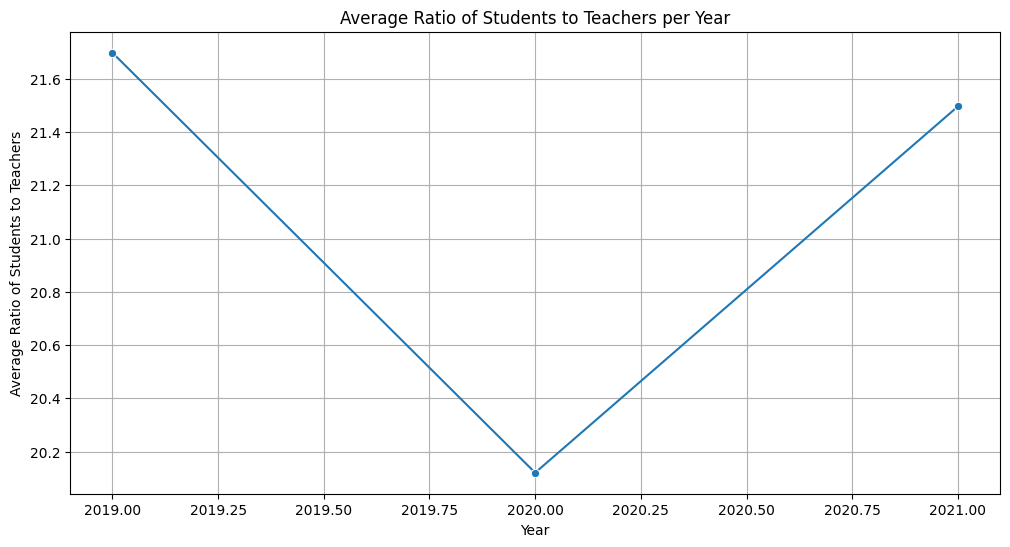

In [ ]:
# Line plot for average ratio of students to teachers per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='ratio_siswa_guru', data=avg_ratio_per_year, marker='o')
plt.title('Average Ratio of Students to Teachers per Year')
plt.xlabel('Year')
plt.ylabel('Average Ratio of Students to Teachers')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average ratio of students to teachers per year and kecamatan
avg_ratio_per_year_kecamatan = data.groupby(['year', 'kecamatan'])['ratio_siswa_guru'].mean().reset_index()
print("Average Student-Teacher Ratio per Year by Kecamatan")
print(avg_ratio_per_year_kecamatan)

Average Student-Teacher Ratio per Year by Kecamatan
     year      kecamatan  ratio_siswa_guru
0    2019         Cakung         23.736785
1    2019  Cempaka Putih         20.701243
2    2019     Cengkareng         23.299942
3    2019       Cilandak         18.040258
4    2019      Cilincing         25.071143
..    ...            ...               ...
127  2021     Taman Sari         21.086532
128  2021        Tambora         21.049092
129  2021    Tanah Abang         19.387756
130  2021  Tanjung Priok         22.718294
131  2021          Tebet         17.415466

[132 rows x 3 columns]


In [ ]:
# Pivot the data to get years as columns
pivot_ratio_per_year_kecamatan = avg_ratio_per_year_kecamatan.pivot(index='kecamatan', columns='year', values='ratio_siswa_guru')

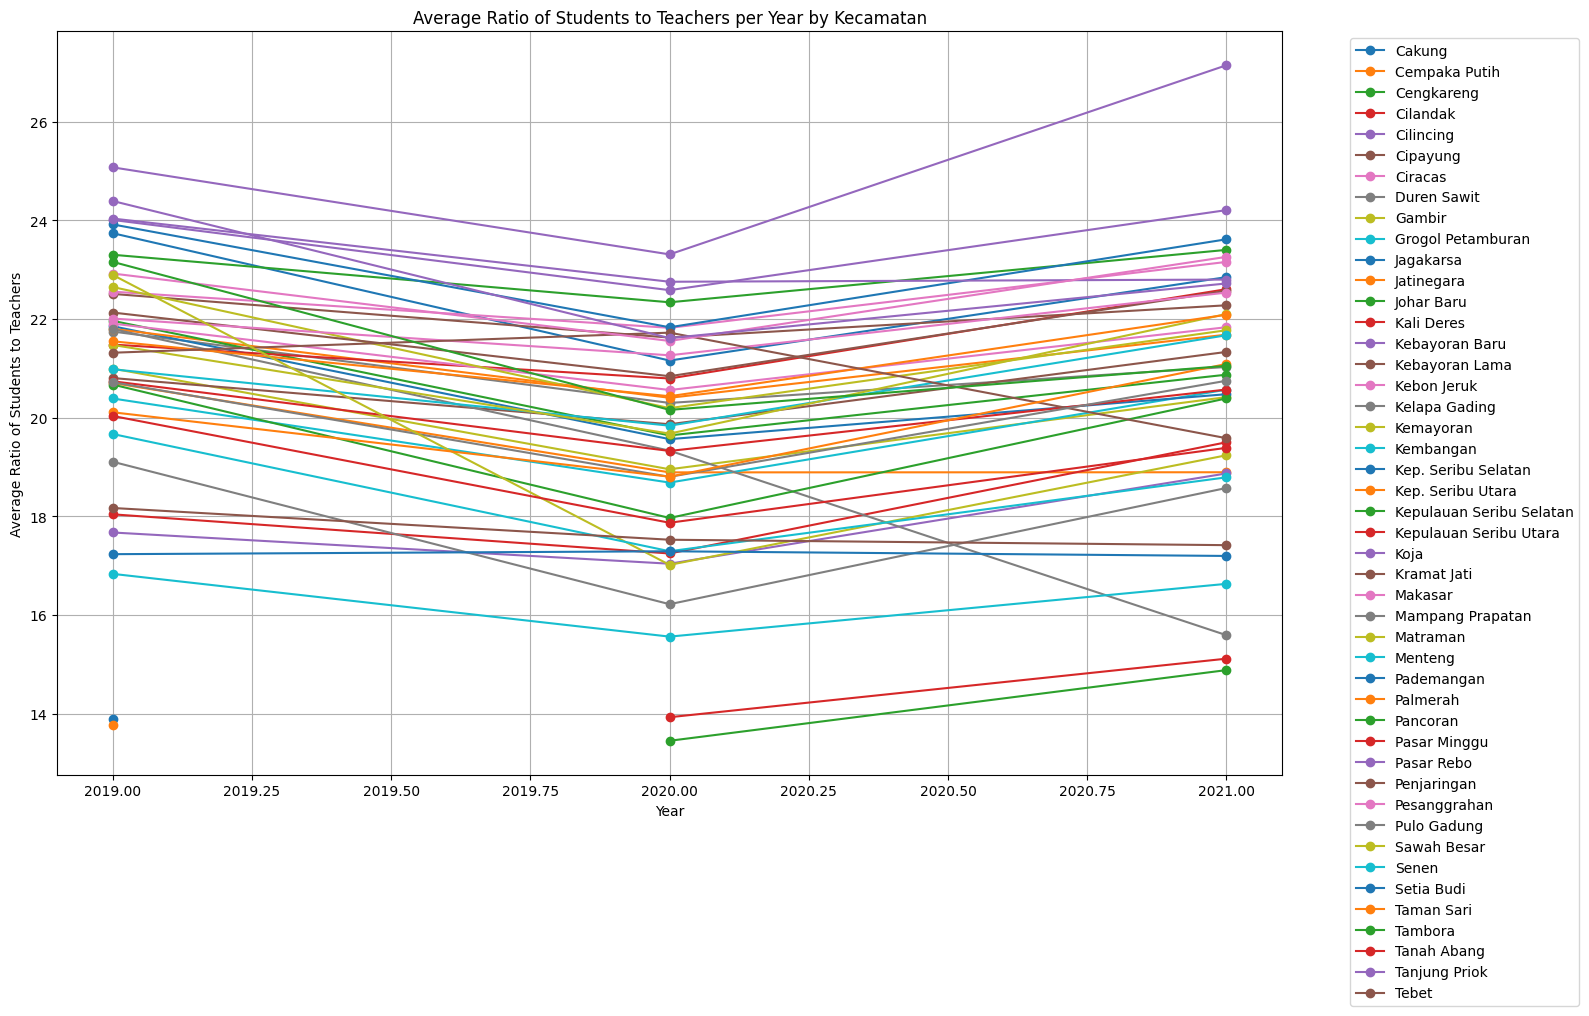

In [ ]:
# Line plot for average ratio of students to teachers per year for each kecamatan
plt.figure(figsize=(16, 10))
for kecamatan in pivot_ratio_per_year_kecamatan.index:
    plt.plot(pivot_ratio_per_year_kecamatan.columns, pivot_ratio_per_year_kecamatan.loc[kecamatan], marker='o', label=kecamatan)

plt.title('Average Ratio of Students to Teachers per Year by Kecamatan')
plt.xlabel('Year')
plt.ylabel('Average Ratio of Students to Teachers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned and analyzed data to CSV files
data.to_csv('cleaned_data.csv', index=False)
avg_students_teachers.to_csv('avg_students_teachers.csv', index=False)
total_students_teachers.to_csv('total_students_teachers.csv', index=False)
avg_ratio_per_region.to_csv('avg_ratio_per_region.csv', index=False)
avg_ratio_per_year.to_csv('avg_ratio_per_year.csv', index=False)
avg_ratio_per_year_kecamatan.to_csv('avg_ratio_per_year_kecamatan.csv', index=False)

In [ ]:
from google.colab import files

files.download('cleaned_data.csv')
files.download('avg_students_teachers.csv')
files.download('total_students_teachers.csv')
files.download('avg_ratio_per_region.csv')
files.download('avg_ratio_per_year.csv')
files.download('avg_ratio_per_year_kecamatan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Kesimpulan :

1. Statistik Deskriptif:

- Memberikan gambaran umum mengenai distribusi jumlah siswa dan guru di sekolah dasar DKI Jakarta.

2. Analisis Perbandingan:

- Sekolah Negeri memiliki rata-rata jumlah siswa lebih tinggi dan rasio siswa-guru yang lebih besar dibandingkan dengan sekolah swasta.

- Total jumlah siswa dan guru menunjukkan beban yang lebih besar pada sekolah negeri.

3. Analisis Berdasarkan Wilayah:

- Wilayah Jakarta Utara memiliki rasio siswa-guru tertinggi, menunjukkan beban yang lebih besar pada guru di wilayah ini.

- Jakarta Selatan memiliki rasio siswa-guru terendah, menunjukkan alokasi sumber daya yang lebih baik.

4. Analisis Temporal:

- Tren tahunan menunjukkan fluktuasi dalam rasio siswa-guru, dengan penurunan pada tahun 2020 yang mungkin disebabkan oleh berbagai faktor seperti kebijakan pendidikan atau pandemi.

- Analisis per kecamatan menunjukkan variasi signifikan dalam tren rasio siswa-guru, menunjukkan perbedaan kebutuhan dan distribusi sumber daya di setiap kecamatan.

## Rekomendasi:

1. Alokasi Sumber Daya: Distribusi sumber daya guru yang lebih merata untuk mengurangi beban di wilayah dengan rasio siswa-guru tinggi.

2. Kebijakan Khusus: Kebijakan khusus untuk wilayah dan kecamatan dengan tren rasio siswa-guru yang tidak stabil.

3. Monitoring dan Evaluasi: Penggunaan dashboard interaktif di Power BI untuk membantu pengambil kebijakan dalam monitoring dan evaluasi data secara real-time.